In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D


ImportError: cannot import name 'Axes2D'

In [ ]:
#Reading data 

data= pd.read_csv('AirQualityUCI.csv')
data.info()


In [ ]:
#initializing inputs and outputs


X1 = data['PT08.S4(NO2)'] #changing different paraments of data will change the accuracy 

X= X1.head(300)
Y = data['PT08.S5(O3)']

# correlation between data
correlation = data["PT08.S4(NO2)"].corr(data["PT08.S5(O3)"], method="pearson")
print("finding correlation between PT08.S4(NO2) and PT08.S5(O3) = ",correlation)


In [ ]:
# formula
# m =  SUM( (Xi-X_bar)(Yi-Y_bar) ) / SUM((Xi-Xbar)^2)

# c = Y- b1 * X

# Y = b1 * x + b0

# Xi= inputs

# X_bar= mean of input variables

# Yi= outputs

# Y_bar= mean of output variables


# RMSE = ROOT((1/N)(SUM(Yi -Y_th_PREDTICED)))


In [ ]:
#finding mean of X_bar and Y_bar
X_bar = np.mean(X)
Y_bar = np.mean(Y)

print("mean of each parameters are :  ")
print("")
print(X_bar)
print("")
print("mean of the output is : ", Y_bar)

#total number of values
n = len(X)


print("")
print("total number of values are : " , n)

In [ ]:
upper_value = 0
lower_value = 0

for i in range(n):
    upper_value = upper_value + (X[i] - X_bar) * (Y[i] - Y_bar)
    lower_value = lower_value + (X[i] - X_bar) ** 2


M = upper_value / lower_value

#bias
C = Y_bar - ( M * X_bar)

Y = C + M * X



In [ ]:
#calculating performance

# RMSE = ROOT((1/N)(SUM(Yi -Y_th_PREDTICED)))

RMSE= 0

for i in range(n):
    predicted_Y =  M * X[i] + C
    RMSE += (Y[i] -  predicted_Y) ** 2
    RMSE = np.sqrt(RMSE/n)
    
print("accuracy : ",RMSE)    

In [28]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(X,Y)

result=model1.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     9617.
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          2.15e-229
Time:                        22:38:13   Log-Likelihood:                -2128.0
No. Observations:                 300   AIC:                             4258.
Df Residuals:                     299   BIC:                             4262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PT08.S4(NO2)     1.5947      0.016     98.064   

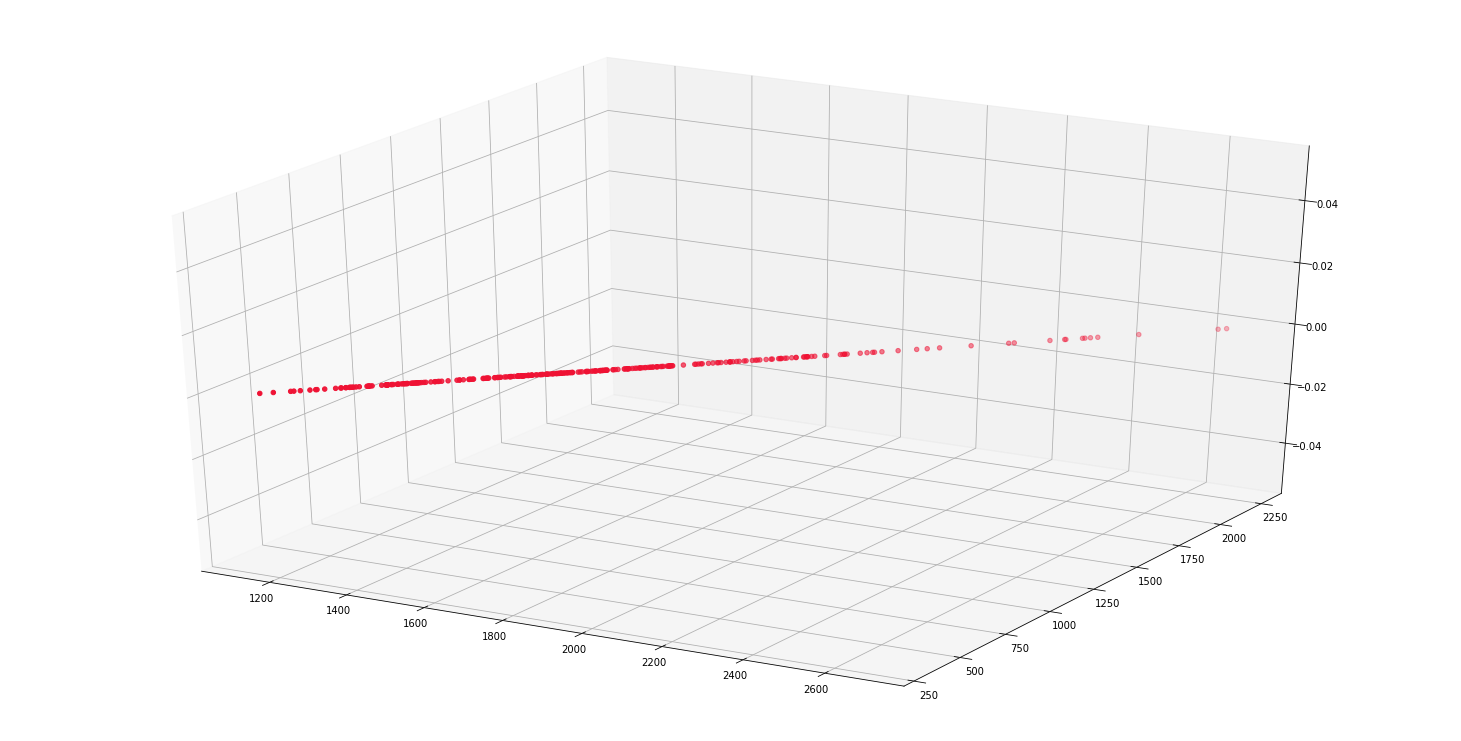

In [27]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X,Y, color='#ef1234')
plt.show()